#Spam SMS Detection

##Importing necessary modules

In [111]:
import pandas as pd
import chardet
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [112]:
with open("../content/spam.csv", "rb") as f:
  encoding = chardet.detect(f.read())['encoding']

In [113]:
df = pd.read_csv("../content/spam.csv", encoding=encoding)

In [114]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [115]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [116]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [117]:
df.shape

(5572, 5)

###Dropping empty columns

In [118]:
columns_to_drop = [2]

In [119]:
df.drop(df.columns[columns_to_drop], axis=1, inplace=True)

In [120]:
df.columns

Index(['v1', 'v2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [121]:
df.head()

,v1,v2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN


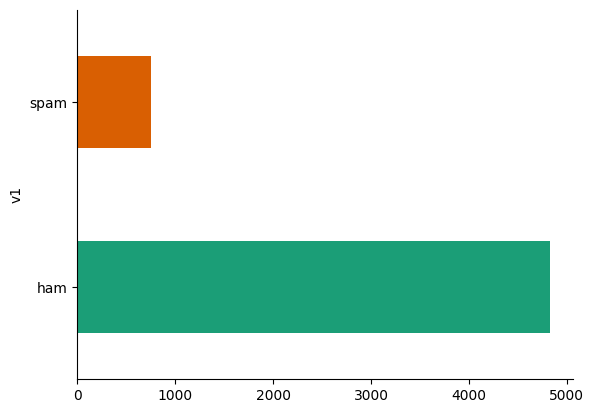

In [122]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

###Creating TF-IDF matrix

In [123]:
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

In [124]:
tfidf_vectorizer = TfidfVectorizer(max_features=5572)

In [125]:
X = tfidf_vectorizer.fit_transform(df['v2'])
y = df['v1']


In [126]:
X_df = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(X_df)

       00  000  000pes  008704050406  0089  0121  01223585236  01223585334  \
0     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
1     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
2     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
3     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
4     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
...   ...  ...     ...           ...   ...   ...          ...          ...   
5567  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5568  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5569  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5570  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5571  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   

      0125698789   02  ...  zaher  zed  zindgi  zoe  zogtorius 

###Train test split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Using Logistic Regression Algorithm

In [128]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)


LogisticRegression()

In [129]:
y_pred = log_reg_model.predict(X_test)

###Calculating Accuracy

In [130]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9641255605381166


In [131]:
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.73      0.85       150

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115



##Confusion Matrix

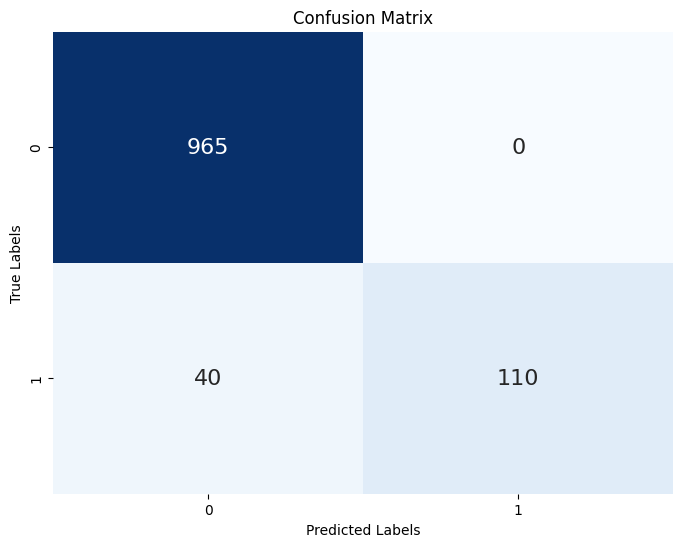

In [132]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Generate ROC curve and calculate AUC score

In [137]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

In [134]:
print("False Positive Rate:", fpr)
print("True Positive Rate:", tpr)
print("ROC AUC Score:", auc_score)

False Positive Rate: [0. 0. 1.]
True Positive Rate: [0.         0.73333333 1.        ]
ROC AUC Score: 0.8666666666666667


##Plotting ROC Curve

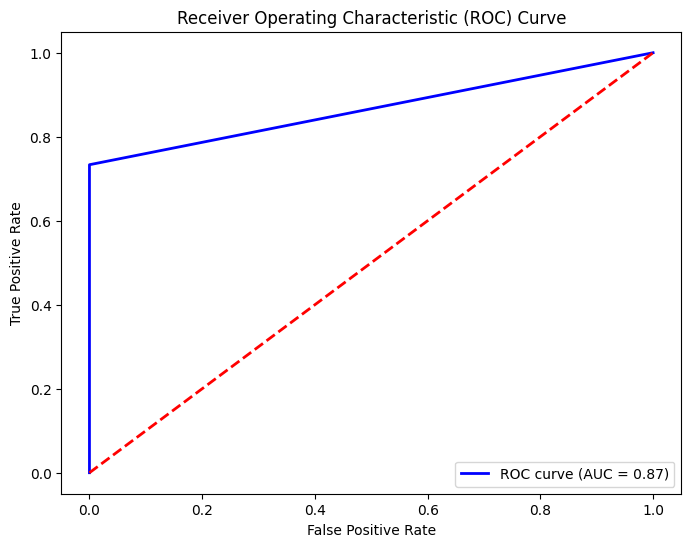

In [135]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()